# Titanic - RandomForest e Features Engineering
Este notebook cria um modelo baseado no dataset do Titanic e usando RandomForests. Esse notebook trata de dados faltantes, features categóricas e um pouco de feature engineering.

Vamos começar importando as bibliotecas básicas que vamos usar.

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Próximo passo: carregando os dados a partir dos CSVs disponibilizados no Kaggle. Estamos usando a biblioteca pandas para esse propósito.

In [142]:
# Vamos iniciar o notebook importanto o Dataset
titanic_df = pd.read_csv("../input/train.csv")
test_df    = pd.read_csv("../input/test.csv")

# Podemos observar as primeiras linhas dele.
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [143]:
print(test_df.shape, titanic_df.shape)

(418, 11) (891, 12)


In [144]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Vamos começar com o básico de tratamento desse dataset. Importante: tudo que fizermos vamos fazer no dataset de treinamento e também de teste.

## Tratando a Idade - Imputation

Nos casos anteriores, avisamos que idade tinha campos vazios.

In [145]:
titanic_df['Age'].isnull().any()
df_full = titanic_df.append(test_df)

Teremos que preencher isso de algum jeito. Uma abordagem comum nesses casos é usar uma média ou mediana. Vamos usar aqui a mediana do dataset - mas poderíamos agrupar por sexo, por exemplo. Fica a seu critério fazer isso de forma mais fancy. ;)

In [146]:
age_median = df_full['Age'].median()
print(age_median)

28.0


In [147]:
titanic_df['Age'] = titanic_df['Age'].fillna(age_median)
test_df['Age'] = test_df['Age'].fillna(age_median)
titanic_df['Age'].isnull().any()

False

Ótimo! Um problema a menos. Essa técnica que usamos é chamada de "imputation".

## Tratando Gênero - LabelEncoding

Próximo passo: vamos tratar das features categóricas. Queremos transformar features que são de múltiplas categorias em dados numéricos que podemos trabalhar. O caso mais óbivo é sexo.

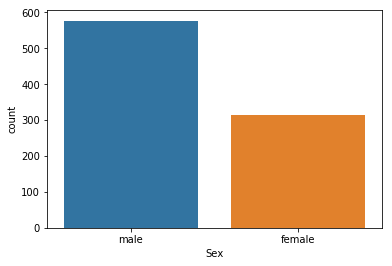

In [148]:
import seaborn as sns
sns.countplot(titanic_df['Sex']);

Vamos usar aqui um transformer do sklearn chamado LabelEncoder. Ele transforma a primeira categoria no número 0, a segunda no número 1 e assim por diante.

In [104]:
#from sklearn.preprocessing import LabelEncoder
#sex_encoder = LabelEncoder()

#sex_encoder.fit(list(titanic_df['Sex'].values) + list(test_df['Sex'].values))

LabelEncoder()

In [10]:
#sex_encoder.classes_

array(['female', 'male'],
      dtype='<U6')

In [11]:
#titanic_df['Sex'] = sex_encoder.transform(titanic_df['Sex'].values)
#test_df['Sex'] = sex_encoder.transform(test_df['Sex'].values)

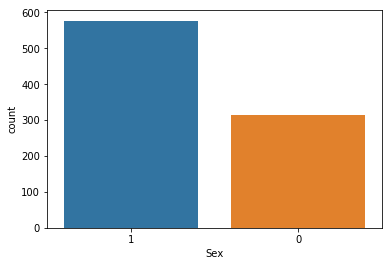

In [12]:
#sns.countplot(titanic_df['Sex'], order=[1,0]);

Ok, a feature Sex já está devidamente encodada. Vamos dar mais uma espiada nos dados?

In [149]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Já temos mais colunas numéricas. Vamos estudar o impacto de adicionar essas colunas no nosso modelo. Vamos usar o nosso modelo anterior.

In [14]:
feature_names = ['Pclass', 'SibSp', 'Parch', 'Fare']

In [15]:
from sklearn.model_selection import train_test_split
train_X, valid_X, train_y, valid_y = train_test_split(titanic_df[feature_names].as_matrix(), 
                                                      titanic_df['Survived'].as_matrix(),
                                                      test_size=0.2,
                                                      random_state=42)
                                                      
                                                      
print(train_X.shape)
print(valid_X.shape)                                           
print(train_y.shape)
print(valid_y.shape)

(712, 4)
(179, 4)
(712,)
(179,)


In [16]:
from sklearn.ensemble import RandomForestClassifier

#Hiperparametros
rf_clf = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=7)


#Treino
rf_clf.fit(train_X, train_y)

print("Score Treino")
print(rf_clf.score(train_X, train_y))


print("Score Validação")
print(rf_clf.score(valid_X, valid_y))

Score Treino
0.783707865169
Score Validação
0.737430167598


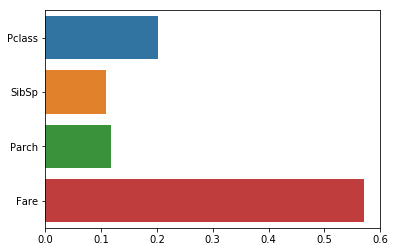

In [17]:
import seaborn as sns
sns.barplot(rf_clf.feature_importances_, feature_names);

Vamos incluir algumas features adicionais

In [150]:
seed = 42

feature_names = ['Pclass', 'SibSp', 'Parch', 'Fare', 'Age', 'Sex']

'''
X = titanic_df[feature_names].as_matrix()
y = titanic_df['Survived'].as_matrix()

from sklearn.model_selection import train_test_split
train_X, valid_X, train_y, valid_y = train_test_split(X,y, test_size=0.2,random_state=seed)
                                                                                                        
print(train_X.shape)
print(valid_X.shape)                                           
print(train_y.shape)
print(valid_y.shape)

rf_clf = RandomForestClassifier(random_state=seed, n_estimators=200, max_depth=5)
rf_clf.fit(train_X, train_y)

print(rf_clf.score(train_X, train_y))
print(rf_clf.score(valid_X, valid_y))

sns.barplot(rf_clf.feature_importances_, feature_names);
'''

"\nX = titanic_df[feature_names].as_matrix()\ny = titanic_df['Survived'].as_matrix()\n\nfrom sklearn.model_selection import train_test_split\ntrain_X, valid_X, train_y, valid_y = train_test_split(X,y, test_size=0.2,random_state=seed)\n                                                                                                        \nprint(train_X.shape)\nprint(valid_X.shape)                                           \nprint(train_y.shape)\nprint(valid_y.shape)\n\nrf_clf = RandomForestClassifier(random_state=seed, n_estimators=200, max_depth=5)\nrf_clf.fit(train_X, train_y)\n\nprint(rf_clf.score(train_X, train_y))\nprint(rf_clf.score(valid_X, valid_y))\n\nsns.barplot(rf_clf.feature_importances_, feature_names);\n"

Melhoramos um pouco o nosso score de validação. Depois de incluir as novas features no modelo, agora Sexo passa a ser a feature mais importante.

## Feature Engineering - Título

Feature Engineering é uma técnica que envolve criar novas features - em geral a partir de outras. Vamos usar essa técnica para extrair o título a partir do nome.

In [151]:
titanic_df.head()['Name']

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [152]:
import re
def extract_title(name):
    x = re.search(', (.+?)\.', name)
    if x:
        return x.group(1)
    else:
        return ''

In [153]:
titanic_df['Name'].apply(extract_title).unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [154]:
titanic_df['Title'] = titanic_df['Name'].apply(extract_title)
test_df['Title'] = test_df['Name'].apply(extract_title)

In [155]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


## OneHotEncoding

Agora vamos trabalhar com features que são MultiCategoricas. 

In [156]:
train_X.shape
titanic_df['Embarked']= titanic_df['Embarked'].fillna('S')

In [157]:
#from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction import DictVectorizer

feature_names = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Title', 'Embarked']
dv = DictVectorizer()

dv.fit(titanic_df[feature_names].append(test_df[feature_names]).to_dict(orient='records'))
dv.feature_names_

['Age',
 'Embarked=C',
 'Embarked=Q',
 'Embarked=S',
 'Fare',
 'Parch',
 'Pclass',
 'Sex=female',
 'Sex=male',
 'SibSp',
 'Title=Capt',
 'Title=Col',
 'Title=Don',
 'Title=Dona',
 'Title=Dr',
 'Title=Jonkheer',
 'Title=Lady',
 'Title=Major',
 'Title=Master',
 'Title=Miss',
 'Title=Mlle',
 'Title=Mme',
 'Title=Mr',
 'Title=Mrs',
 'Title=Ms',
 'Title=Rev',
 'Title=Sir',
 'Title=the Countess']

In [158]:
train_X, valid_X, test_y, valid_y = train_test_split(dv.transform(titanic_df[feature_names].to_dict(orient='records')),
                                                     titanic_df['Survived'],
                                                     test_size=0.2,
                                                     random_state=42)

In [159]:
train_X.shape

(712, 28)

0.863764044944
0.832402234637


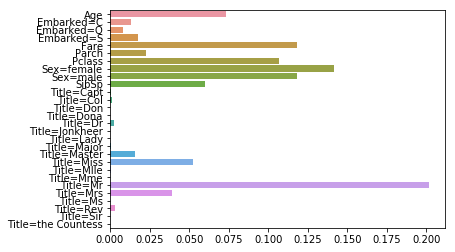

In [160]:

from sklearn.model_selection import train_test_split

#for n in range(1, 20):
rf_clf = RandomForestClassifier(random_state=42, n_estimators=56, max_depth=6)
rf_clf.fit(train_X, train_y)

print(rf_clf.score(train_X, train_y))
print(rf_clf.score(valid_X, valid_y))

sns.barplot(rf_clf.feature_importances_, dv.feature_names_);

## Exercício
A coluna Embarked contém o porto de embarque do passageiro. Algumas linhas não estão preenchidas.

- Implemente uma estratégia para fazer Imputation do porto de embarque desses passageiros. 
- Em seguida, faça o OneHotEncoding para que eles entrem na lista de Features do Modelo. Essas novas features melhoram o modelo de alguma forma?
- Crie uma nova feature, com o tamanho da familia. O tamanho da família é derivado de Parch e SibSp
- Inclua essa nova feature no modelo. Ela melhora o modelo de alguma forma?

## Submissão do Arquivo

In [161]:
test_df['Fare'] = test_df['Fare'].fillna(0)
test_df['Embarked']= test_df['Embarked'].fillna('S')

Infelizmente no dataset de teste, um dos passageiros está com Fare vazio. :-(

Para conseguirmos evoluir, vamos setar o Fare vazio para 0.0

Lembra que o sklean trabalha com matrizes numpy, certo?

In [162]:
test_X = dv.transform(test_df[feature_names].to_dict(orient='records'))
print(test_X.shape)

(418, 28)


Legal. Temos 418 amostras. Vamos usar o nosso modelo pra prever a sobrevivência dessas 418 pessoas.

In [163]:
y_pred = rf_clf.predict(test_X)

In [164]:
y_pred.shape

(418,)

Ótimo! Já temos aquilo que precisávamos. Próximo passo agora é empacotar num arquivo CSV e submeter no Kaggle.

In [165]:
submission_df = pd.DataFrame()

In [166]:
submission_df['PassengerId'] = test_df['PassengerId']
submission_df['Survived'] = y_pred
submission_df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [168]:
submission_df.to_csv('submit6.csv', index=False)

Por favor, anote aqui para referência: quanto foi o seu score de treinamento do modelo? E no dataset de Validação? Quanto foi o seu score na submissão do Kaggle?